**1: Importing Libraries**

In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# Import data analysis tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import graphviz

# Import decision tree model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

# Import XAI Shap tool
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 1.4 MB/s eta 0:00:00


**2: Import csv file from google drive and load data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/pima-indians-diabetes.csv")
data.head()
field1_name = 'Number of times pregnant'
field2_name = 'Plasma glucose concentration'
field3_name = 'Diastolic blood pressure'
field4_name = 'Triceps skinfold thickness'
field5_name = '2-Hour serum insulin'
field6_name = 'Body mass index'
field7_name = 'Diabetes pedigree function'
field8_name = 'Age'

**3: histograms**

In [6]:
def draw_histogram(datas,color,feature):
  plt.hist(datas,bins=20 , color=color, edgecolor='black')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title(f'{feature} Histogram')
  plt.show()

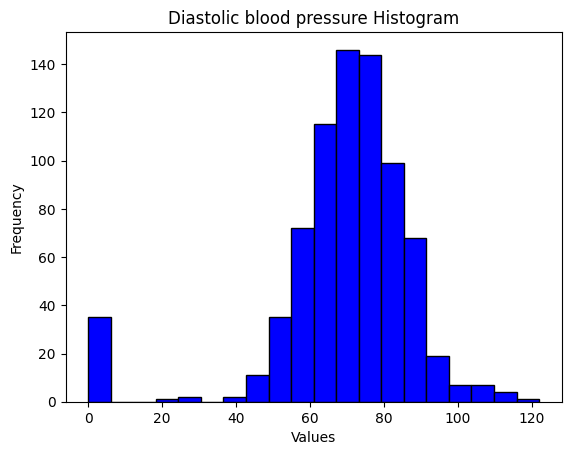

In [9]:
draw_histogram(data[field3_name],'red',field3_name)

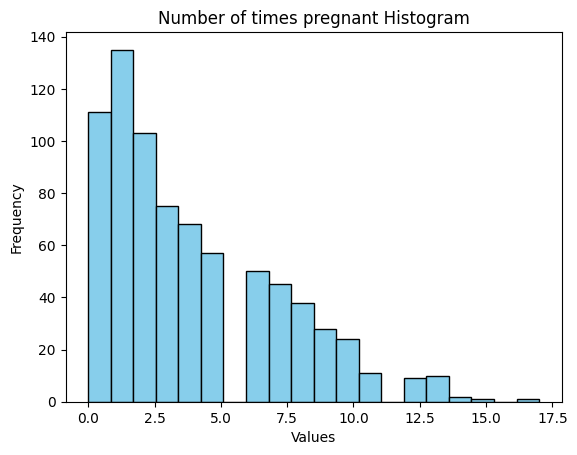

In [7]:
draw_histogram(data[field1_name],'skyblue',field1_name)

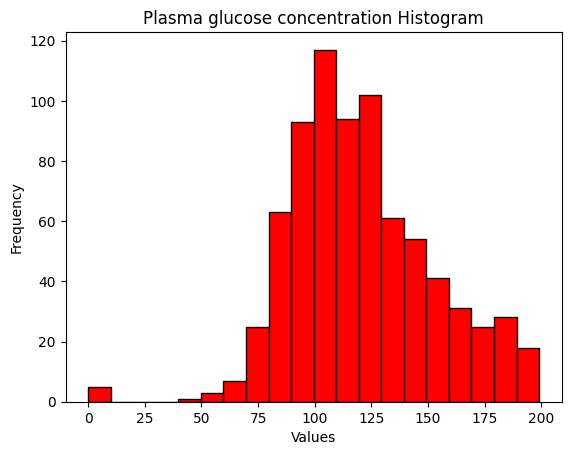

In [8]:
draw_histogram(data[field2_name],'blue',field2_name)

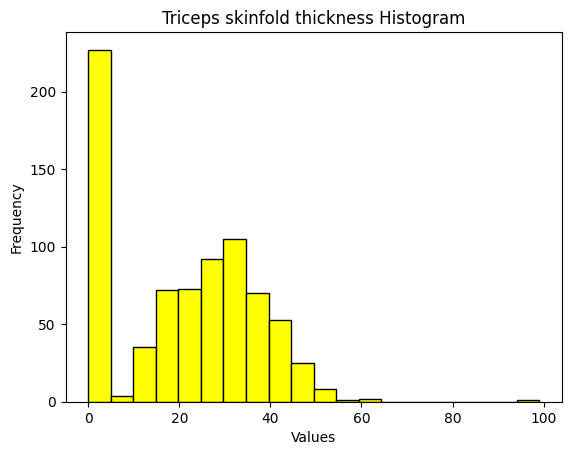

In [10]:
draw_histogram(data[field4_name],'cyan',field4_name)

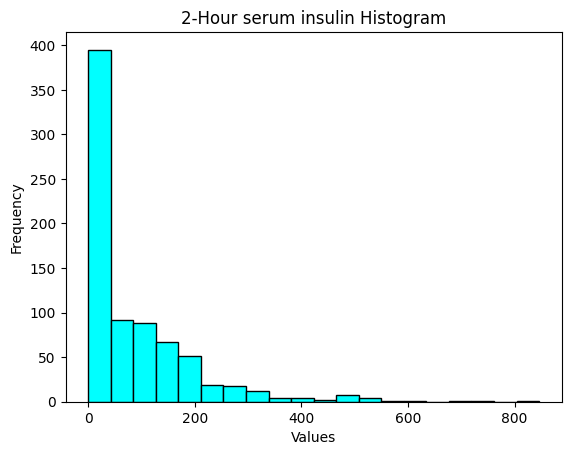

In [11]:
draw_histogram(data[field5_name],'yellow',field5_name)

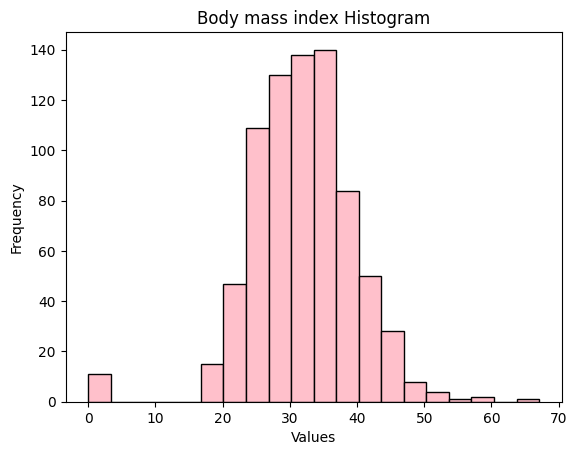

In [16]:
draw_histogram(data[field6_name],'pink',field6_name)

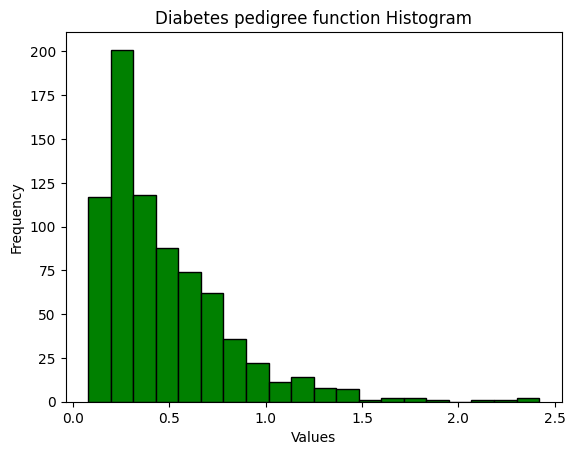

In [14]:
draw_histogram(data[field7_name],'green',field7_name)

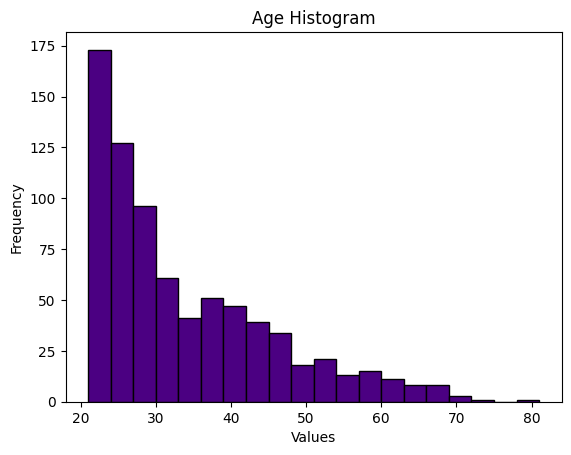

In [15]:
draw_histogram(data[field8_name],'indigo',field8_name)

**4: histogram depended on classes**

In [17]:
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

def plot_histogram(feature):
    plt.hist(class_0[feature], color='cyan', bins=20, alpha=0.5, label='کلاس 0')
    plt.hist(class_1[feature], color='pink', bins=20, alpha=0.5, label='کلاس 1')
    plt.title(f'نمودار توزیع {feature}')
    plt.xlabel('مقادیر')
    plt.ylabel('تعداد تکرار')
    plt.legend()
    plt.show()

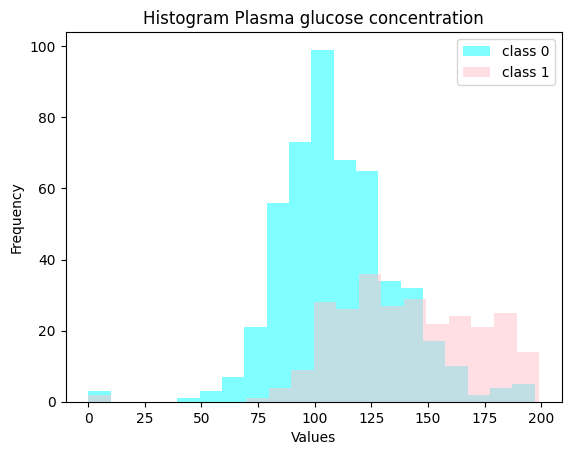

In [18]:
plot_histogram(field2_name)

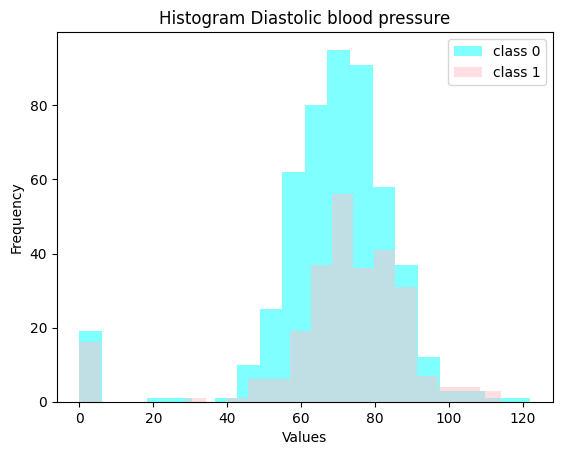

In [19]:
plot_histogram(field3_name)

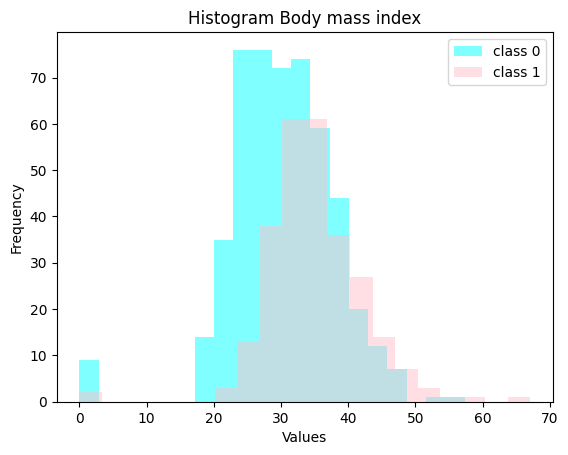

In [20]:
plot_histogram(field6_name)

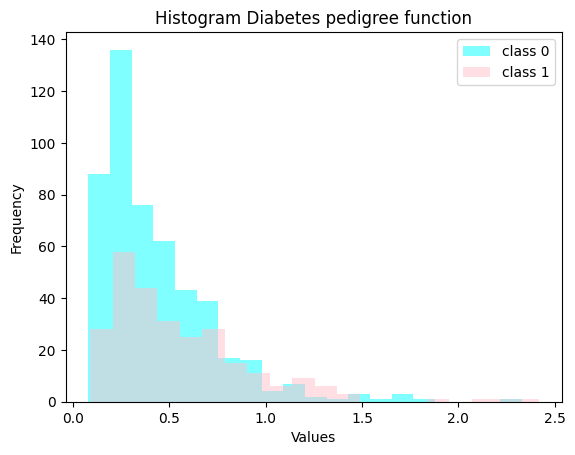

In [21]:
plot_histogram(field7_name)

**5: Variance and Mean of Body mass index**

In [23]:
Body_mass_index_value = data[field6_name]
variance = np.var(Body_mass_index_value)
mean = np.mean(Body_mass_index_value)
print(f'variance = {variance} and mean = {mean}')

variance = 62.079046478271486 and mean = 31.992578124999998


**6: scatterplot**

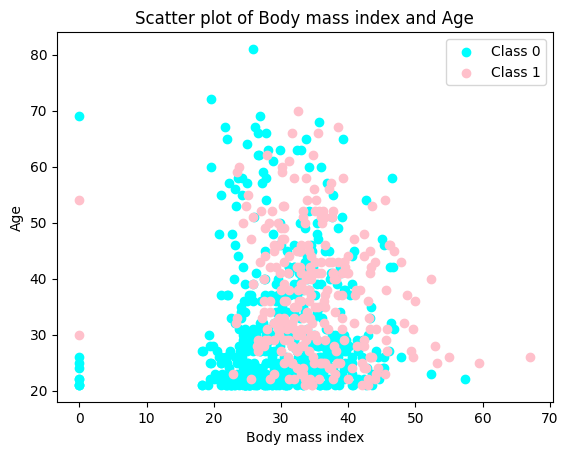

In [24]:
class0 = data[data['Class'] == 0]
class1 = data[data['Class'] == 1]
Body_mass_index_class0 = class0[field6_name]
Age_class0 = class0[field8_name]
Body_mass_index_class1 = class1[field6_name]
Age_class1 = class1[field8_name]
plt.scatter(Body_mass_index_class0, Age_class0, color='cyan', label='کلاس 0')
plt.scatter(Body_mass_index_class1, Age_class1, color='pink', label='کلاس 1')
plt.xlabel('شاخص توده بدنی')
plt.ylabel('سن')
plt.legend(loc='upper right')
plt.title('نمودار پراکنش شاخص توده بدنی و سن')
plt.show()

**6: Decision Tree**

In [26]:
#Creating two variables with x and y
X = data.drop('Class',axis=1)
Y = data['Class']
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Creating decision tree

In [27]:
#Creating Decision Tree
tree_model = DecisionTreeClassifier(max_depth= 4)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

Show Decision Tree

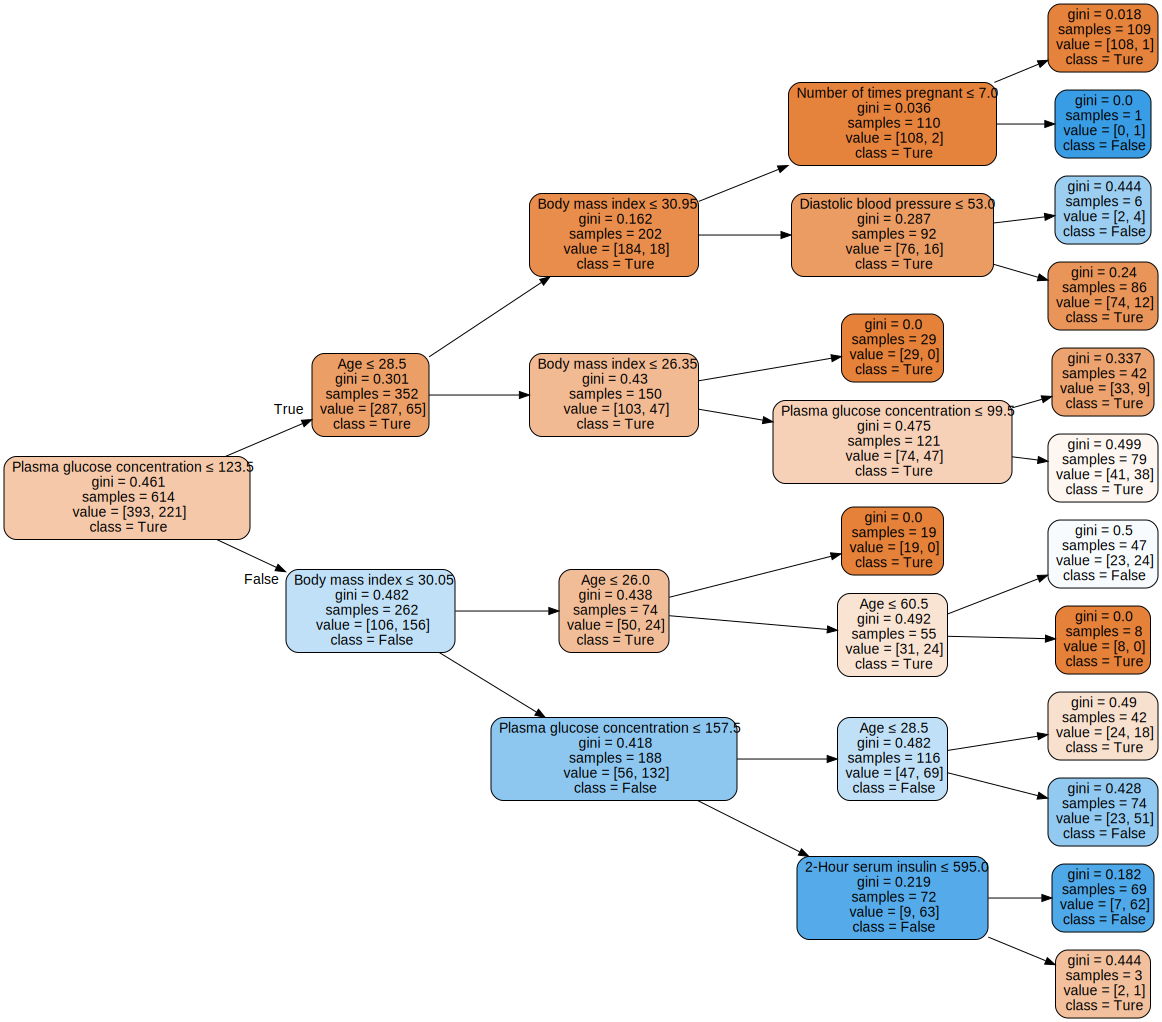

In [28]:
#Showing Decision Tree as graph
dotData = export_graphviz(tree_model, out_file=None,
                         feature_names = X_train.columns,
                         class_names = ["Ture","False"],
                         filled=True, rounded=True,
                         special_characters=True, rotate=True)

graph = graphviz.Source(dotData)
graph

Accuracy

In [29]:
#Calculating accuracy of decision tree with score function
accuracy = round(tree_model.score(X_test, Y_test), 4)*100
print(f"Accuracy: {accuracy}%")

Accuracy: 76.62%
